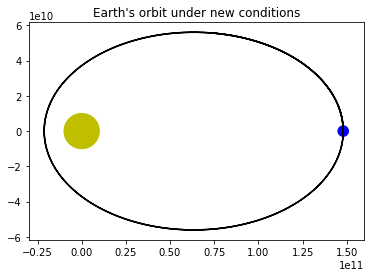

In [84]:
#PART A

#first we set up the initial conditions
import math
pos = [1.48 * (10 ** 11), 0]
vel = [0, 1.5 * (10 ** 4)]

#then we set up acceleration
def accel (pos):
    #this is the distance Earth is from the Sun
    r = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    #gravitational constant
    G = 6.67 / (10 ** 11)
    #mass of the sun
    M_s = 1.99 * (10 ** 30)
    #return g = GM_s/r^2 and use pos[0]/r for x and pos[1]/r for y
    return [-1 * G * M_s / (r ** 2) * pos[0] / r, -1 * G * M_s / (r ** 2) * pos[1] / r]

#set up steps
t_step = 1000
t_max = 3600 * 24 * 365
t = 0

#set up initial leapfrog condition
acc = accel(pos)
vel[0] += acc[0] * t_step / 2
vel[1] += acc[1] * t_step / 2

#where we'll store our x, y values in position
x = []
y = []

#start the loop
while t * t_step <= t_max:
    #add to x, y
    x.append(pos[0])
    y.append(pos[1])
    
    #find the new position
    pos[0] += vel[0] * t_step
    pos[1] += vel[1] * t_step
    
    #find new acceleration
    acc = accel(pos)
    
    #find new velocity
    vel[0] += acc[0] * t_step
    vel[1] += acc[1] * t_step
    
    #increment timestep
    t += 1

#plot it
import matplotlib.pyplot as plt
fig = plt.figure()
sp = fig.add_subplot(1, 1, 1)
sp.plot(x, y, 'black')
sp.add_patch(plt.Circle((0, 0), 10 ** 10, color='y'))
sp.add_patch(plt.Circle((1.48 * (10 ** 11), 0), 3 * 10 ** 9, color='b'))
plt.title("Earth's orbit under new conditions")
plt.show(sp)

In [73]:
#PART B

#set up initial conditions
pos = [1.48 * (10 ** 11), 0]
vel = [0, 1.5 * (10 ** 4)]

#set minimum distance to initial distance
r_min = math.sqrt(pos[0] ** 2 + pos[1] ** 2)

#then we set up acceleration
def accel (pos):
    #this is the distance Earth is from the Sun
    r = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    #gravitational constant
    G = 6.67 / (10 ** 11)
    #mass of the sun
    M_s = 1.99 * (10 ** 30)
    #return g = GM_s/r^2 and use pos[0]/r for x and pos[1]/r for y
    return [-1 * G * M_s / (r ** 2) * pos[0] / r, -1 * G * M_s / (r ** 2) * pos[1] / r]

#set up steps
t_step = 1000
t_max = 3600 * 24 * 365
t = 0

#set up initial leapfrog condition
acc = accel(pos)
vel[0] += acc[0] * t_step / 2
vel[1] += acc[1] * t_step / 2

#where we'll store our x, y values in position
x = []
y = []

#start the loop
while t * t_step <= t_max:
    #add to x, y
    x.append(pos[0])
    y.append(pos[1])
    
    #find the new position
    pos[0] += vel[0] * t_step
    pos[1] += vel[1] * t_step
    
    #check if the current radius is the smallest radius since
    if math.sqrt(pos[0] ** 2 + pos[1] ** 2) < r_min:
        r_min = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    
    #find new acceleration
    acc = accel(pos)
    
    #find new velocity
    vel[0] += acc[0] * t_step
    vel[1] += acc[1] * t_step
    
    #increment timestep
    t += 1

#say what the smallest orbit is
print("The smallest distance between the Earth and Sun in this orbit is: " + str(r_min) + " meters.")

The smallest distance between the Earth and Sun in this orbit is: 21227966949.127472 meters.


In [80]:
#PART C
#At each time step, let's calculate the energies

#PART B

#set up initial conditions
pos = [1.48 * (10 ** 11), 0]
vel = [0, 1.5 * (10 ** 4)]

#gravitational constant
G = 6.67 / (10 ** 11)
#mass of the sun
M_s = 1.99 * (10 ** 30)
#mass of the earth
M_e = 6 * (10 ** 24)

#set minimum distance to initial distance
r_min = math.sqrt(pos[0] ** 2 + pos[1] ** 2)

#then we set up acceleration
def accel (pos):
    #this is the distance Earth is from the Sun
    r = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    #return g = GM_s/r^2 and use pos[0]/r for x and pos[1]/r for y
    return [-1 * G * M_s / (r ** 2) * pos[0] / r, -1 * G * M_s / (r ** 2) * pos[1] / r]

#set up steps
t_step = 1000
t_max = 3600 * 24 * 365
t = 0

#set up initial leapfrog condition
acc = accel(pos)
vel[0] += acc[0] * t_step / 2
vel[1] += acc[1] * t_step / 2

#where we'll store our KE, PE values in position
KE = []
PE = []
TME = []
time = []

#start the loop
while t * t_step <= t_max:
    #add to KE, PE, t
    KE.append((1 / 2) * M_e * (vel[0] ** 2 + vel[1] ** 2))
    PE.append(-G * M_e * M_s / math.sqrt(pos[0] ** 2 + pos[1] ** 2))
    TME.append((1 / 2) * M_e * (vel[0] ** 2 + vel[1] ** 2) + -G * M_e * M_s / math.sqrt(pos[0] ** 2 + pos[1] ** 2))
    time.append(t * t_step / (3600 * 24))
    
    #find the new position
    pos[0] += vel[0] * t_step
    pos[1] += vel[1] * t_step
    
    #check if the current radius is the smallest radius since
    if math.sqrt(pos[0] ** 2 + pos[1] ** 2) < r_min:
        r_min = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    
    #find new acceleration
    acc = accel(pos)
    
    #find new velocity
    vel[0] += acc[0] * t_step
    vel[1] += acc[1] * t_step
    
    #increment timestep
    t += 1

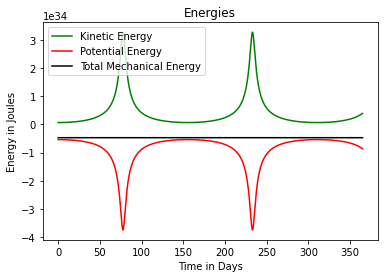

The total energy is constant at around -4.704799308432887e+33 Joules.


In [85]:
#PART D
#Let's plot potentential and kinetic energies now
fig = plt.figure()
sp = fig.add_subplot(1, 1, 1)
sp.plot(time, KE, 'green', label="Kinetic Energy")
sp.plot(time, PE, 'red', label="Potential Energy")
sp.plot(time, TME, 'black', label="Total Mechanical Energy")
plt.legend(loc="upper left")
plt.title("Energies")
plt.xlabel("Time in Days")
plt.ylabel("Energy in Joules")
plt.show(sp)

#find how much energy we have
print("The total energy is constant at around " + str(TME[len(TME) - 1]) + " Joules.")

In [78]:
#PART E
#find final energy
TME_fin = TME[len(TME) - 1]

#find initial energy
pos = [1.48 * (10 ** 11), 0]
vel = [0, 1.5 * (10 ** 4)]
TME_ini = (1 / 2) * M_e * (vel[0] ** 2 + vel[1] ** 2) + -G * M_e * M_s / math.sqrt(pos[0] ** 2 + pos[1] ** 2)

#find the difference
print("The amount of energy non-conserved with a step size of 1000 seconds is " + str(abs(TME_ini - TME_fin)) + " Joules.")
print("As a percentage, this is " + str(100 * abs(TME_ini - TME_fin) / abs(TME_ini)) + "% that is lost.")
print("As this percent is small, that means energy is mostly conserved.")

The amount of energy non-conserved with a step size of 1000 seconds is 1.2682591346809067e+30 Joules.
As a percentage, this is 0.02694944593276279% that is lost.
As this percent is small, that means energy is mostly conserved.
